# 2 Dimensional Scans
Outputting the graphs of the data collected by running the robot :) This data is just for viewing purposes, there is a separate notebook for testing the pathfinder modules.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2

from mpl_toolkits import mplot3d
%matplotlib inline

#TODO not urgent, but the 2D scans notebook has not
# been update to reflect the new numpy schema of the
# point data. Should work on that. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
path = os.path.abspath('..\\')
print("Available test files:")
file_itr = 0
while os.path.exists(path + "\\Scans\\test_%s.json" % file_itr):
    print("\t\\Scans\\test_%s.json" % file_itr)
    file_itr +=1
file_itr = 0
while os.path.exists(path + "\\Debugging Scripts\\test_%s.json" % file_itr):
    print("\t\\Debugging Scripts\\test_%s.json" % file_itr)
    file_itr +=1


Available test files:
	\Scans\test_0.json
	\Scans\test_1.json
	\Scans\test_2.json
	\Scans\test_3.json
	\Scans\test_4.json
	\Scans\test_5.json
	\Scans\test_6.json
	\Scans\test_7.json
	\Scans\test_8.json
	\Scans\test_9.json
	\Scans\test_10.json
	\Scans\test_11.json
	\Scans\test_12.json
	\Scans\test_13.json
	\Scans\test_14.json
	\Scans\test_15.json
	\Scans\test_16.json
	\Scans\test_17.json
	\Scans\test_18.json
	\Scans\test_19.json
	\Scans\test_20.json


In [61]:
debug_mode = True
save_figs = False
file_no = 20

if save_figs:
    plt.rcParams['figure.dpi'] = 500
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    })
else:
    plt.rcParams['figure.dpi'] = 200

In [62]:
# current_file = r"\Debugging Scripts\test_%s.json" % file_no
current_file = r"\Scans\test_%s.json" % file_no
path = os.path.abspath('..\\') + current_file

if debug_mode:
    print(path)

with open(path, 'r') as infile:
    json_data = json.load(infile)

# print(json_data)

r_o_m = json_data["range of motion"]
resolution = json_data["resolution"]
points = json_data["points"]
max_point = json_data["max_point"]

if debug_mode:
    for i in json_data.keys():
        if i != "points":
            print(f"{i}: {json_data[i]}")
        else:
            print(f"{i}: {json_data[i][0]}")

c:\Users\ander\Documents\COBOT-Transducer-Control-Code\Scans\test_20.json
range of motion: {'X': [0, 0], 'Y': [0, 0], 'Z': [-6, 6], 'Rx': [0, 0], 'Ry': [-25, 25], 'Rz': [0, 0]}
resolution: [0.5, 0.5]
max_point: [0.0, 0.0, -5.0, 0.0, 9.0, 0.0, 58.0]
points: [-6.0, -24.5, 56.0]
notes: No notes passed from setup.
Fullscan version of a pathfinder module, scans the entire search-space at a fixed resolution.
	Range of motion: {'X': [0, 0], 'Y': [0, 0], 'Z': [-6, 6], 'Rx': [0, 0], 'Ry': [-25, 25], 'Rz': [0, 0]}
	Resolution: (0.5, 0.5)
	Highest magnitude found: [ 0.  0. -5.  0.  9.  0. 58.]
active_ROM: ['Z', 'Ry']


In [63]:
# Zs = []
# Rxs = []
# Rys = []
# mags = []

# for p in point_mags:
#     Zs.append(p[0][0][2])
#     Rxs.append(p[0][1][0])
#     Rys.append(p[0][1][1])
#     mags.append(p[1])

# Gonna find the set of Rxs and Rys corresponding only to the Z value found at the max point
# Then do the same for the other guys

np_all = np.array(points)
active_rom = json_data["active_ROM"]
cols = active_rom.copy()
cols.append("mag")
dat = pd.DataFrame(data=np_all, columns=cols)

mp = dat.loc[dat['mag'].idxmax()]

if debug_mode:
    print(mp)
    print(dat.head())
    print(dat.shape)

Z      -5.0
Ry      9.0
mag    58.0
Name: 269, dtype: float64
     Z    Ry   mag
0 -6.0 -24.5  56.0
1 -6.0 -24.0   0.0
2 -6.0 -23.5   1.0
3 -6.0 -23.0   1.0
4 -6.0 -22.5   1.0
(628, 3)


Maximum magnitude:  58.0
Minimum magnitude: 0.0
Median magnitude: 25.0


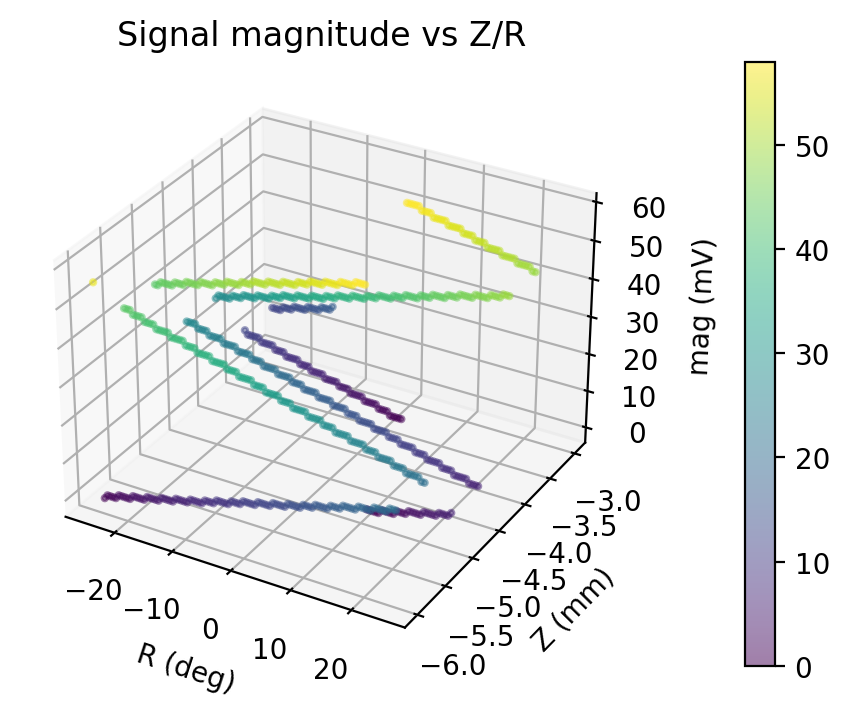

58.0


In [64]:
ax = plt.axes(projection='3d')

if debug_mode:
    print(f"Maximum magnitude:  {max(dat['mag'])}")
    print(f"Minimum magnitude: {min(dat['mag'])}")
    print(f"Median magnitude: {np.median(dat['mag'])}")

med = np.median(dat['mag'])
# dat2 = dat[np.all([dat['mag'] > med*1.3, dat['Ry'] > 5],axis=0)]
dat2 = dat[dat['mag'] > med*1.3]

# fig = ax.scatter(dat2['Rx'], dat2['Ry'], dat2['Z'], c=dat2['mag'], cmap='viridis', alpha=0.1,s=4)
fig = ax.scatter(dat['Ry'], dat['Z'], dat['mag'], c=dat['mag'], cmap='viridis', alpha=0.5,s=4)

ax.set_xlabel("R (deg)")
ax.set_ylabel("Z (mm)")
ax.set_zlabel("mag (mV)")
ax.set_title("Signal magnitude vs Z/R")

plt.colorbar(fig, pad=0.13)
if save_figs:
    plt.savefig("figures\\2D_fullscan_render_test_%s.jpg" % file_no, dpi=400)
plt.show()

print(max(dat['mag']))


In [65]:
# "mps" stands for "max points," or all the points in Rx/Ry space that occur at the max
# value of Z, rotated for each of the other dimensions
# mp = max_point[0]

zmps = dat[dat['Z'] == mp['Z']].reset_index(drop=True)
Rmps = dat[dat['Ry'] == mp['Ry']].reset_index(drop=True)

if debug_mode:
    print(f"Active range of motion: {active_rom}")
    print(f"Shape of points array: {dat.shape}")
    print(f"Tenth point_mag item (representative): {np_all[10]}")
    print(f"Testing the Z-max-points array:\n{zmps.head(4)}\n(Should be all the same as in the maxpoint)")
    print(f"Maximum point: {mp}")

Active range of motion: ['Z', 'Ry']
Shape of points array: (628, 3)
Tenth point_mag item (representative): [ -6.  -19.5   2. ]
Testing the Z-max-points array:
     Z    Ry   mag
0 -5.0 -25.0  43.0
1 -5.0 -24.5  43.0
2 -5.0 -24.0  44.0
3 -5.0 -23.5  44.0
(Should be all the same as in the maxpoint)
Maximum point: Z      -5.0
Ry      9.0
mag    58.0
Name: 269, dtype: float64


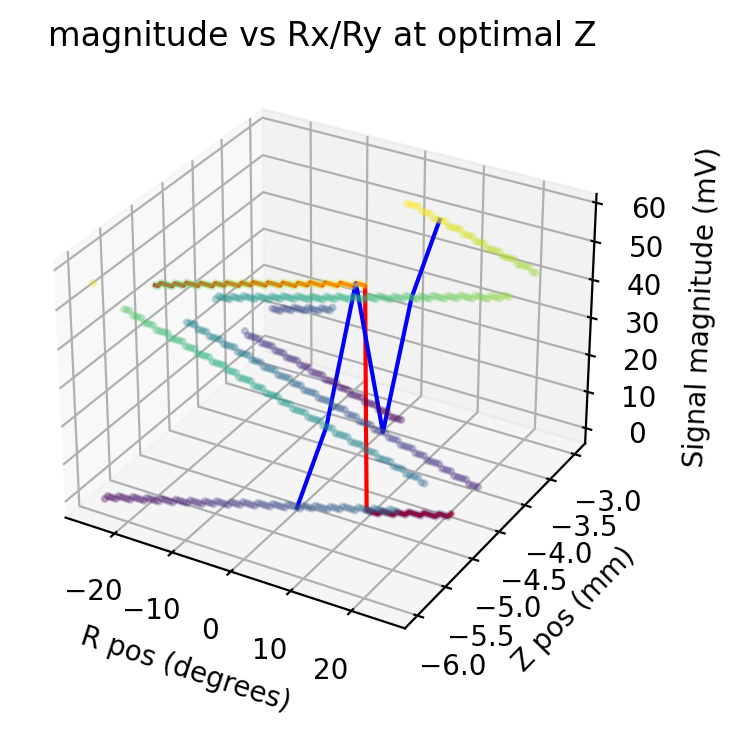

In [66]:
# fig2 = plt.figure(figsize=(14,4), constrained_layout=True)
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })

# tax = fig2.add_subplot(1,3,1, projection='3d')
tax = plt.axes(projection='3d')
tax.scatter3D(dat['Ry'], dat['Z'], dat['mag'], c=dat['mag'], cmap='viridis', alpha=0.25,s=4)
tax.plot3D(zmps['Ry'], zmps['Z'], zmps['mag'],c='r')
tax.plot3D(Rmps['Ry'], Rmps['Z'], Rmps['mag'],c='b')
tax.set_title("magnitude vs Rx/Ry at optimal Z")
tax.set_xlabel("R pos (degrees)")
tax.set_ylabel("Z pos (mm)")
tax.set_zlabel("Signal magnitude (mV)")

plt.show()

if save_figs:
    plt.savefig("figures\\2D_fullscan_trace_%s.jpg" % file_no, dpi=400)
plt.show()

KeyError: "None of [Int64Index([22, 48], dtype='int64')] are in the [index]"

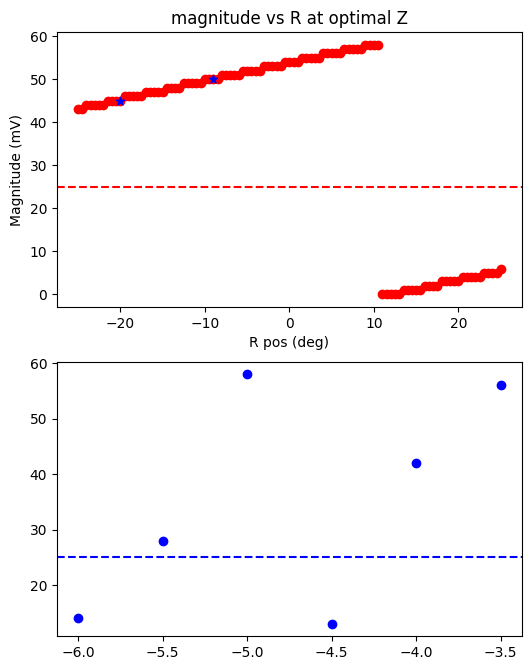

In [67]:
fig3 = plt.figure(figsize=(6,8), dpi=100)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.8, 
#                     hspace=0.4)

# interpolation_windows = {'Ry': [27,77], 'Z': [11,20]} # Best for scan_11.json
interpolation_windows = {'Ry': [10,32], 'Z': [22,48]}

tax = fig3.add_subplot(211)
tax.scatter(zmps['Ry'],zmps['mag'], c='r')

tax.axhline(np.median(dat['mag']), c='r',ls='--')
# tax.axhline(np.median(dat['mag']), c='r',ls='--')
# a = [16,64]
a = interpolation_windows['Ry']
tax.scatter(zmps['Ry'][a],zmps['mag'][a], c='b', marker='*')
tax.set_title("magnitude vs R at optimal Z")
tax.set_xlabel("R pos (deg)")
tax.set_ylabel("Magnitude (mV)")

tax = fig3.add_subplot(212)
tax.scatter(Rmps['Z'],Rmps['mag'], c='b')
tax.axhline(np.median(dat['mag']), c='b',ls='--')
# a = [25,45]
a=interpolation_windows['Z']
tax.scatter(Rmps['Z'][a],Rmps['mag'][a], c='r', marker='*')

tax.set_title("magnitude vs Z at optimal R")
tax.set_xlabel("Z pos (mm)")
tax.set_ylabel("Magnitude (mV)")

fig3.tight_layout()

if save_figs:
    fig3.savefig("figures\\2D_degree_isolation_%s.jpg" % file_no, dpi=400)
plt.show()

In [ ]:
from fit_funcs import *

funcs = [gauss,rational_2,polynomial_2,inv_absolute]
# funcs = [gauss,gauss_plus,rational_2,polynomial_2]

c:\Users\ander\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Gaussian fit
[  1.           1.           1.         180.55172733]


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

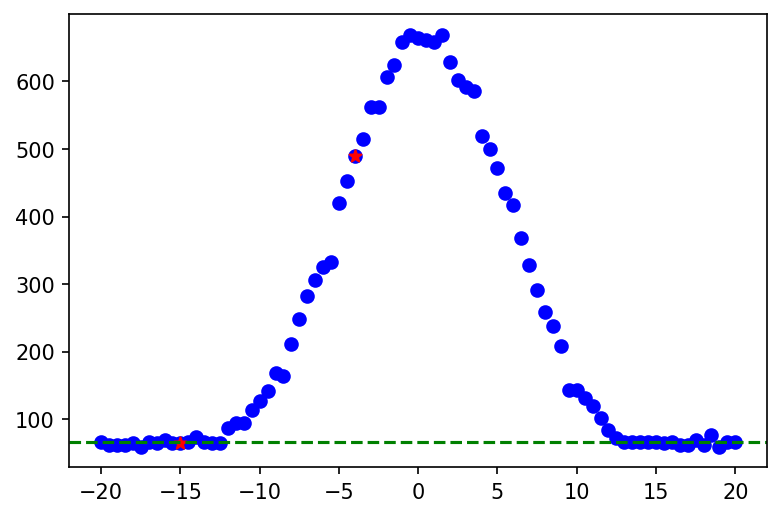

In [ ]:
fig4 = plt.axes()
fig4.get_figure().dpi=150

t = {'Z': {'data': Rmps, 'color1': 'r', 'noise': np.median(dat['mag']), 'color2':'g', \
    'header':'magnitude vs Z at optimal Rx/Ry', 'x-axis': "Z pos (mm)"}, \
    'Ry': {'data': zmps, 'color1':'b', 'noise': np.median(dat['mag']), 'color2':'r', \
    'header':'magnitude vs R at optimal Z', 'x-axis':"Ry ang (deg)"}}

b = "Ry"
a = interpolation_windows[b]

fig4.scatter(t[b]['data'][b],t[b]['data']['mag'], c=t[b]['color1'])

fig4.scatter(t[b]['data'][b][a],t[b]['data']['mag'][a], c=t[b]['color2'], marker='*')
fig4.axhline(t[b]['noise'], c='g',ls='--')

# x = np.linspace(t[b][0].reset_index()[b][a[0]],t[b][0].reset_index()[b][a[1]])
x = np.linspace(min(t[b]['data'][b]),max(t[b]['data'][b]),500)

x_data = t[b]['data'][b][a[0]:a[1]]
y_data = t[b]['data']['mag'][a[0]:a[1]]

for fun in funcs:
    popt, pcov = curve_fit(fun, x_data, y_data,maxfev = 5000)
    if debug_mode:
        print(fun.__doc__)
        print(popt)
    r2 = r_squared(fun, popt, x_data, y_data)
    if r2 > 0.6:
        fig4.plot(x, fun(x, *popt), label=fun.__doc__ + f"\n R2={r2:0.3f}")


x_data = t[b]['data'][b]
y_data = t[b]['data']['mag']

fig4.set_title(t[b]['header'])
fig4.set_xlabel(t[b]['x-axis'])
fig4.set_ylabel("Magnitude (mV)")
fig4.legend(prop={'size':6})
fig4.set_ybound([0, t[b]['data']['mag'].max() * 1.2])

if save_figs:
    fig4.get_figure().savefig(f"figures\\2D_{b}_axis_funcs_{file_no}.jpg", dpi=400)